In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic
from sklearn import linear_model
%matplotlib inline

---
#CLASSIFICATION USING LOGISTIC REGRESSION
---

---
##We need the output of our hypothesis function to give only $0$ or $1$
##i.e. $0 \lt h_{\theta}(x) \lt 1$
#Use the Logistic Function:
##$g(x) = \frac{1}{1+e^{-x}}$
---

---
##This is a plot of the logistic function
---

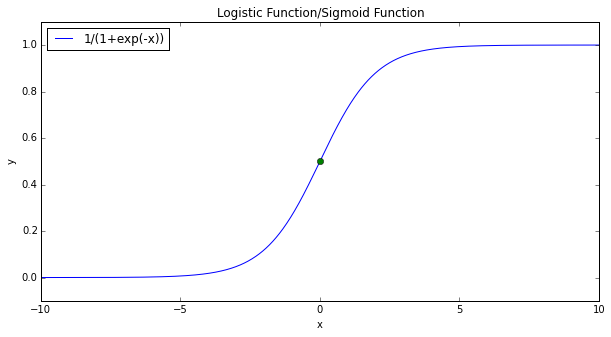

In [3]:
x=np.linspace(-10, 10, 1000)
y = 1.0/(1.0+np.exp(-x))

fig=plt.figure(figsize=(10,5))
ax=plt.subplot(111)
ax.set_ylim(-0.1,1.1)
ax.plot(x, y, label="1/(1+exp(-x))")
ax.plot(0,0.5, 'o')
ax.set_title("Logistic Function/Sigmoid Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc="best")

---
##The solution is to apply the logistic function to our hypothesis function
##$h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$
##$h^{'}(x) = \frac{1}{1+e^{-h(x)}}$
##$h^{'}(x) = \frac{1}{1+e^{-(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2})}}$
---

---
###Interpret the output as a probability!
###Output of the hypothesis function can now be read as: "probability that $y=1$, given $x$"
###Obviously the probability that $y=0$ can be computed as $1-prob(y=1)$
---

---
#The Decision Boundary
---

---
##Setting the decision made based upon the output of the hypothesis function
##$y=1$ if $h^{'} \ge 0.5$
##$y=0$ if $h^{'} \lt 0.5$
##Therefore, $h^{'} \ge 0$ will give $p(y=1) \ge 0.5$
##The logistic regression algorithm will find values for $\theta$ that will satisfy these conditions
---

---
##Example 1: Suppose we know the values for the model parameters $\theta$
---

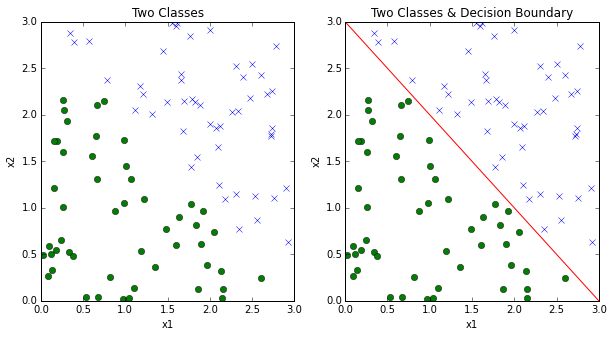

In [4]:
m=100
x=np.zeros((m,2), dtype=np.float)
count=0
count1=m/2

#create an artificial dataset with points that are linearly separable
for i in xrange(200):
    j=np.random.sample()*3.0
    k=np.random.sample()*3.0
    if (j+k<2.9) & (count<m/2):
        x[count][0]=j
        x[count][1]=k
        count += 1
    elif (j+k>3.1) & (count1<m):
        x[count1][0]=j
        x[count1][1]=k
        count1 += 1

#plot the points
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(121)
ax.plot(x[:m/2,0],x[:m/2,1], 'go')
ax.plot(x[m/2:m,0], x[m/2:m,1], 'bx')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Two Classes")

#plot the points and use thee know values of theta to illustrate the decision boundary
ax1=plt.subplot(122)
ax1.plot(x[:m/2,0],x[:m/2,1], 'go')
ax1.plot(x[m/2:m,0], x[m/2:m,1], 'bx')
x1=np.linspace(0.0,3.0,100)
x2=np.linspace(0.0,3.0,100)
y=[]
for xxx1 in x1:
    for xxx2 in x2:
        if xxx1+xxx2==3:
            y.append((xxx1,xxx2))

y=np.array(y)
ax1.plot(y[:,0], y[:,1], 'r-')
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Two Classes & Decision Boundary")


---
#Linear Decision Boundary
##$h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$
##$h^{'}(x) = \frac{1}{1+e^{-h(x)}}$
##$h^{'}(x) = \frac{1}{1+e^{-(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2})}}$
##Find a value for $\theta_{0}, \theta_{1}, \theta_{2}$ that will separate the 2 classes maximally
##$\theta_{0}=-3, \theta_{1}=1, \theta_{2}=1$
##if$-3.0 + x_{1} + x_{2} \ge 0$ then predict $y=1$
##because if $-3.0 + x_{1} + x_{2} \ge 0$ then $h^{'}_{\theta}(x)\ge0.5$
##The decision boundary is described by the line $x_{1} + x_{2} = 3$
---

---
##Example 2: A more complicated example where we, again, know the values for the model parameters $\theta$
---

56


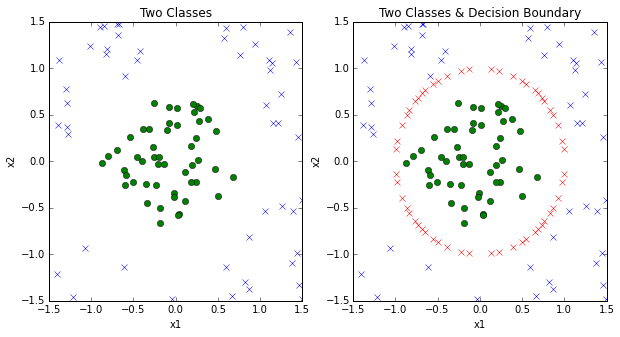

In [28]:
m=100
x=np.zeros((m,2), dtype=np.float)
count=0
count1=m/2

#create some artificial data where one class of points is 'inside' another class
for i in xrange(100000):
    j=(np.random.sample()-0.5)*3.0
    k=(np.random.sample()-0.5)*3.0
    if (np.abs(j)+np.abs(k)<0.9)& (count<m/2):
        x[count][0]=j
        x[count][1]=k
        count += 1
    elif (np.abs(j)+np.abs(k)>1.5) & (count1<m):
        x[count1][0]=j
        x[count1][1]=k
        count1 += 1

#plot the points
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(121)
ax.plot(x[:m/2,0],x[:m/2,1], 'go')
ax.plot(x[m/2:m,0], x[m/2:m,1], 'bx')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Two Classes")

#plot the points and using the know model parameters plot the decision boundary
ax1=plt.subplot(122)
ax1.plot(x[:m/2,0],x[:m/2,1], 'go')
ax1.plot(x[m/2:m,0], x[m/2:m,1], 'bx')
x1=np.linspace(0.0,3.0,100)
x2=np.linspace(0.0,3.0,100)
y=[]
xx1 = np.linspace(-2,2,1000)
xx2 = np.linspace(-2,2,1000)

for x1 in xx1:
    for x2 in xx2:
        if ((x1*x1)+(x2*x2)<1.0001) & ((x1*x1)+(x2*x2)>0.9999):
            y.append((x1,x2))
print len(y)
y=np.array(y)
ax1.plot(y[:,0], y[:,1], 'rx')
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Two Classes & Decision Boundary")

---
#Non Linear Decision Boundary
##$h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}^{2} + \theta_{4}x_{2}^{2}$
##$h^{'}(x) = \frac{1}{1+e^{-h(x)}}$
##$h^{'}(x) = \frac{1}{1+e^{-(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}^{2} + \theta_{4}x_{2}^{2})}}$
##Find a value for $\theta_{0}, \theta_{1}, \theta_{2}, \theta_{3}, \theta_{4}$ that will separate the 2 classes maximally
##$\theta_{0}=-1, \theta_{1}=0, \theta_{2}=0, \theta_{3}=1, \theta_{4}=1$
##if$-1.0 + x_{1}^{2} + x_{2}^{2} \ge 0$ then predict $y=1$
##because if $-1.0 + x_{1}^{2} + x_{2}^{2} \ge 0$ then $h^{'}_{\theta}(x)\ge0.5$
##The decision boundary is described by the line $x_{1}^{2} + x_{2}^{2} = 1$
---

##Higher order polynomials will lead to even more complex decision boundaries.